# BANKING MARKETING PROJECT

###### importing libraries

In [1]:
import pickle
import pandas_profiling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import  xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay, precision_score,recall_score, f1_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank_marketing.csv')
data.head(5)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
data.shape

(11162, 17)

In [4]:
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data.describe(include='all')

age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan   contact           day  month      duration  \
count    11162  11162     11162  11162.000000  11162  11162.000000   
unique       2      2         3           NaN     12           NaN   
top         no     no  cellular           NaN    may           NaN   
freq      5881   9702      8042           NaN   2824           NaN   
mean       NaN    NaN       NaN     15.658036    NaN    371.993818   
std        NaN    NaN       NaN      8.420740    NaN    347.128386   
min        NaN    NaN       NaN      1.000000    NaN      2.000000   
25%        NaN    NaN       NaN      8.000000    NaN    138.000000   
50%        NaN    NaN       NaN     15.000000    NaN    255.000000   
75%        NaN    NaN       NaN     22.000000    NaN    496.000000   
max        NaN    NaN       NaN     31.000000    NaN   3881.000000   

            campaign         pdays      previous poutcome deposit  
count   11162.000000  11162.000000  11162.000000    11162   11162  
unique           NaN           NaN           NaN        4       2  
top              NaN           NaN           NaN  unknown      no  
freq             NaN           NaN           NaN     8326    5873  
mean        2.508421     51.330407      0.832557      NaN     NaN  
std         2.722077    108.758282      2.292007      NaN     NaN  
min         1.000000     -1.000000      0.000000      NaN     NaN  
25%         1.000000     -1.000000      0.000000      NaN     NaN  
50%         2.000000     -1.000000      0.000000      NaN     NaN  
75%         3.000000     20.750000      1.000000      NaN     NaN  
max        63.000000    854.000000     58.000000      NaN     NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
data.iterrows

<bound method DataFrame.iterrows of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  c

#### Dataset Profile Report

In [10]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

###### Data Visualization

In [12]:
corr=data.corr()

In [13]:
corr.shape

(7, 7)

In [14]:
corr

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000

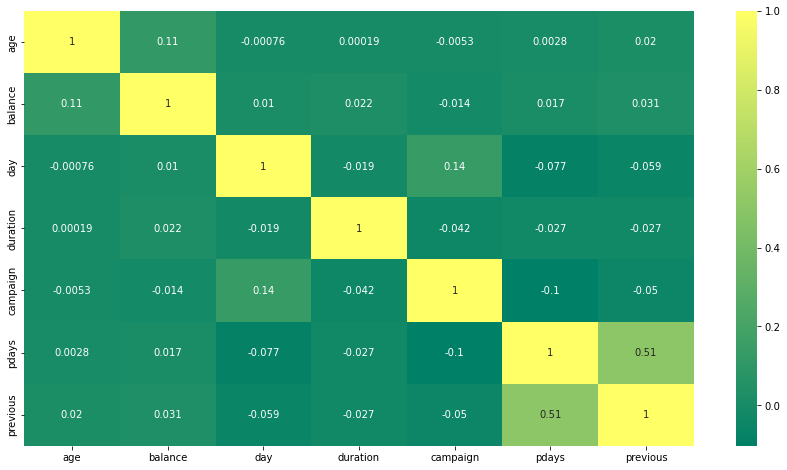

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [18]:
data.duplicated().sum()

0

In [19]:
data['deposit'].value_counts()/data.shape[0]

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

<AxesSubplot:title={'center':'Age'}>

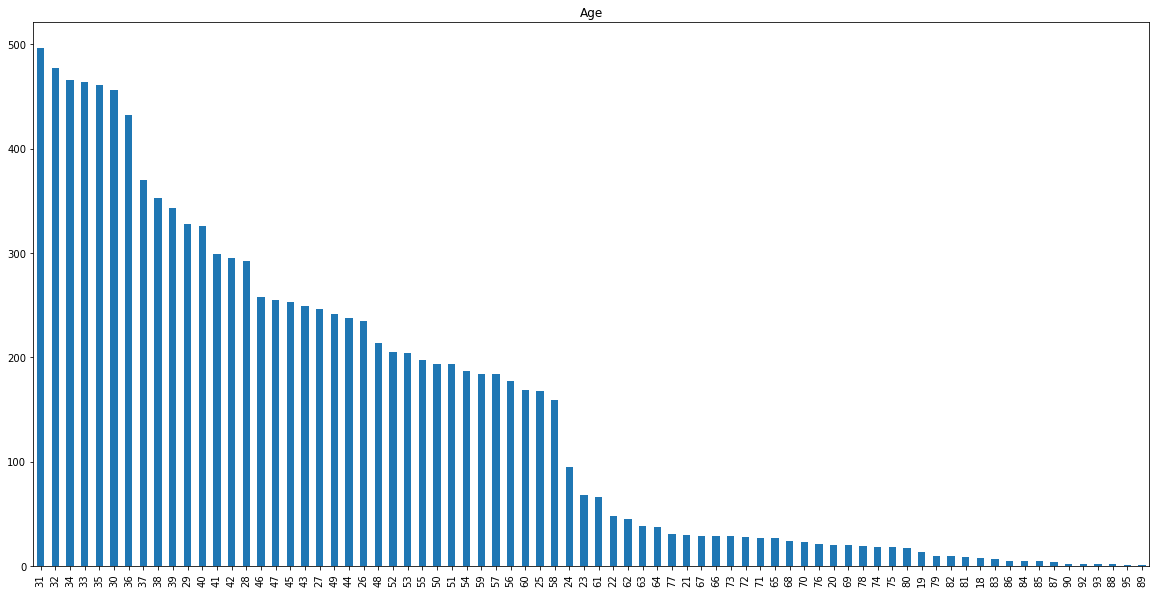

In [20]:
plt.subplot()
data['age'].value_counts().plot(kind='bar',title='Age',figsize=(20,10))

<AxesSubplot:title={'center':'Job'}>

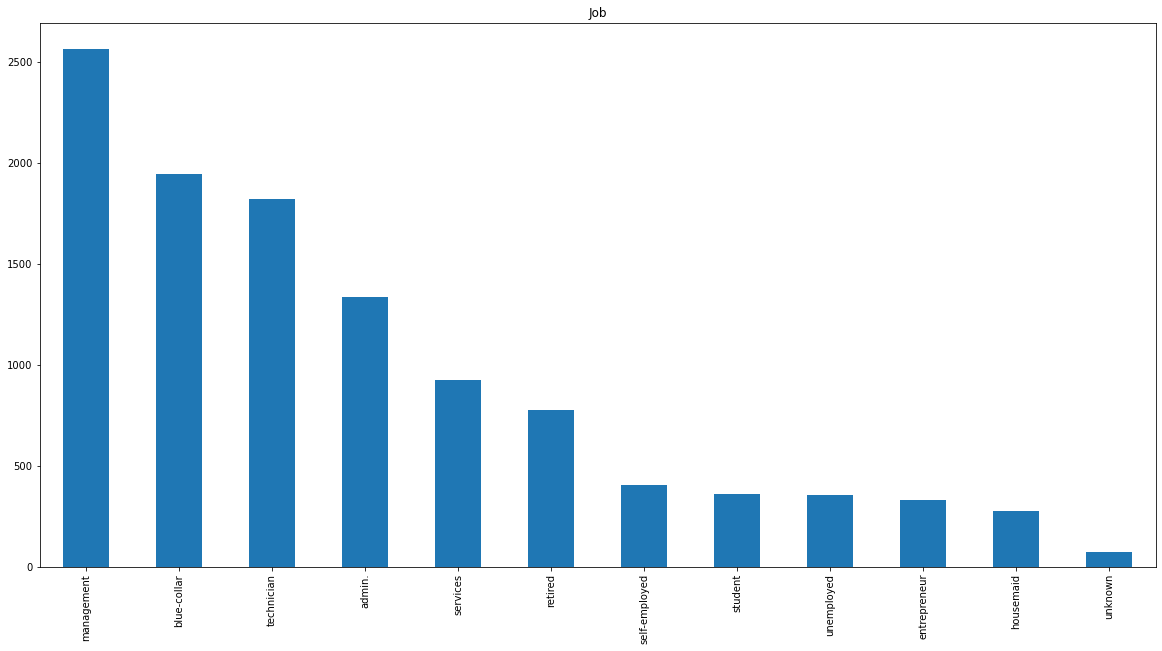

In [21]:
plt.subplot()
data['job'].value_counts().plot(kind='bar',title='Job',figsize=(20,10))

<AxesSubplot:title={'center':'marital'}>

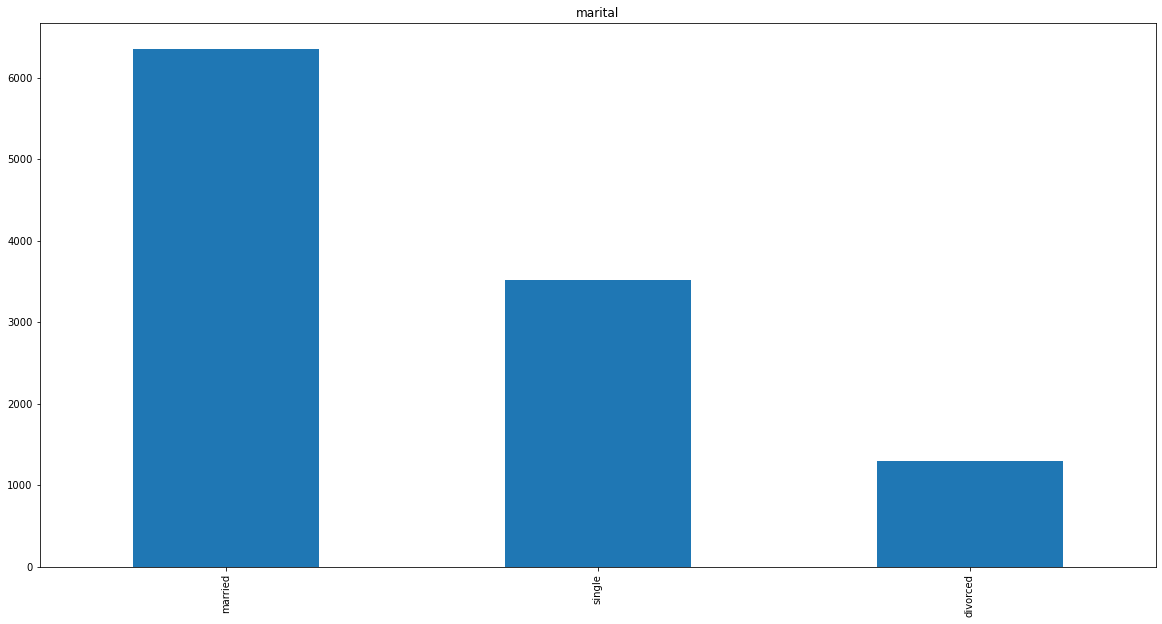

In [22]:
plt.subplot()
data['marital'].value_counts().plot(kind='bar',title='marital',figsize=(20,10))

<AxesSubplot:title={'center':'Education'}>

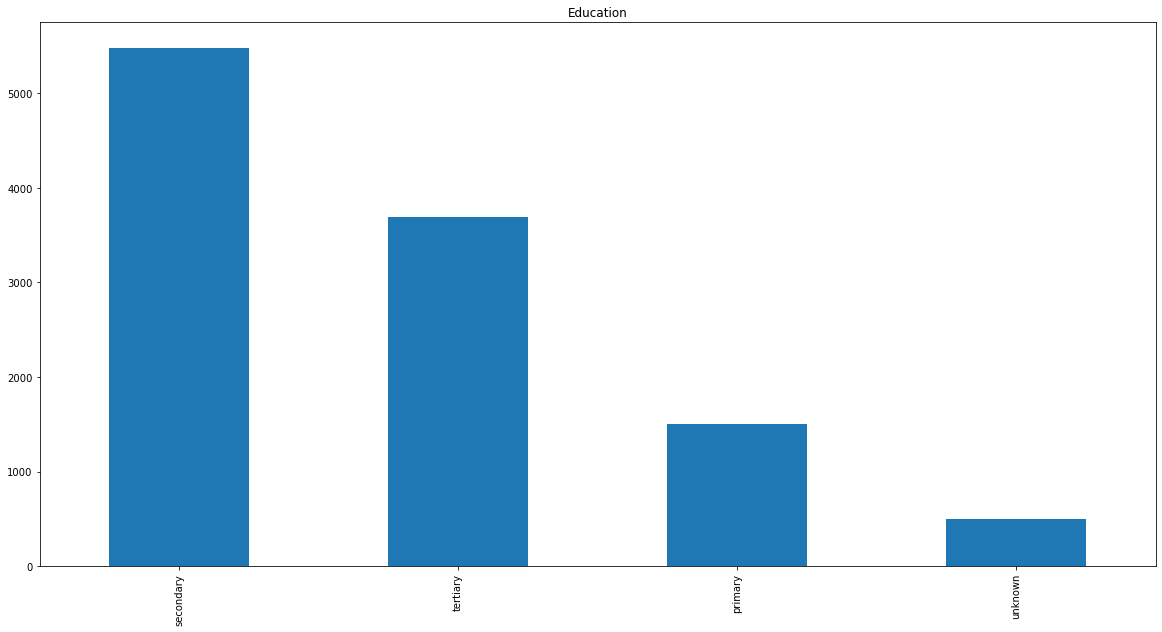

In [23]:
plt.subplot()
data['education'].value_counts().plot(kind='bar',title='Education',figsize=(20,10))

<AxesSubplot:title={'center':'Default'}>

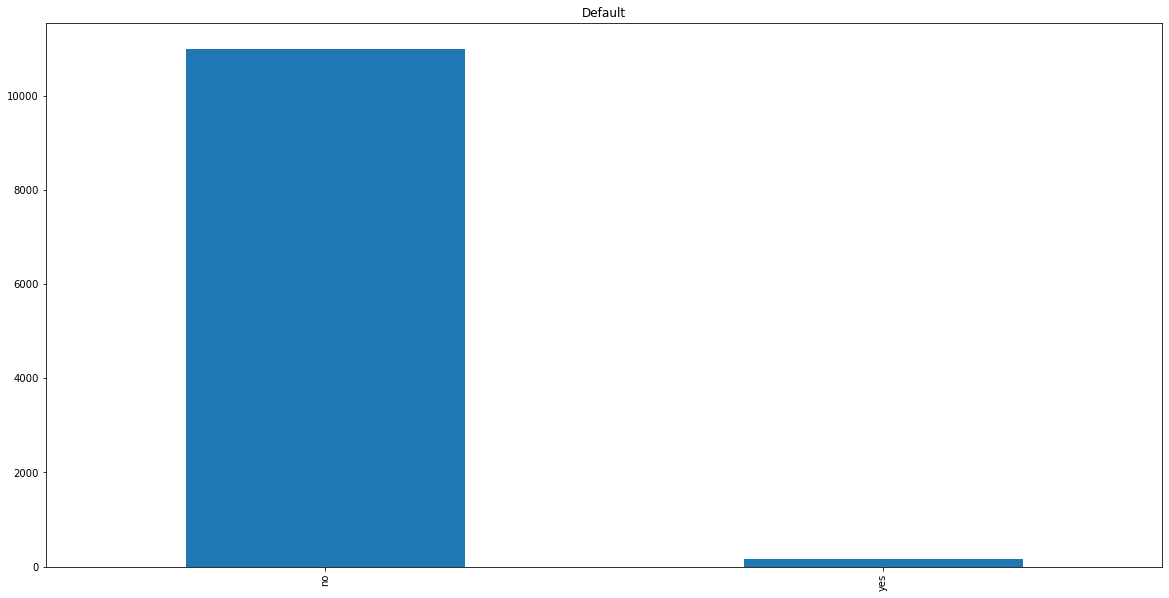

In [24]:
plt.subplot()
data['default'].value_counts().plot(kind='bar',title='Default',figsize=(20,10))

<AxesSubplot:title={'center':'Housing'}>

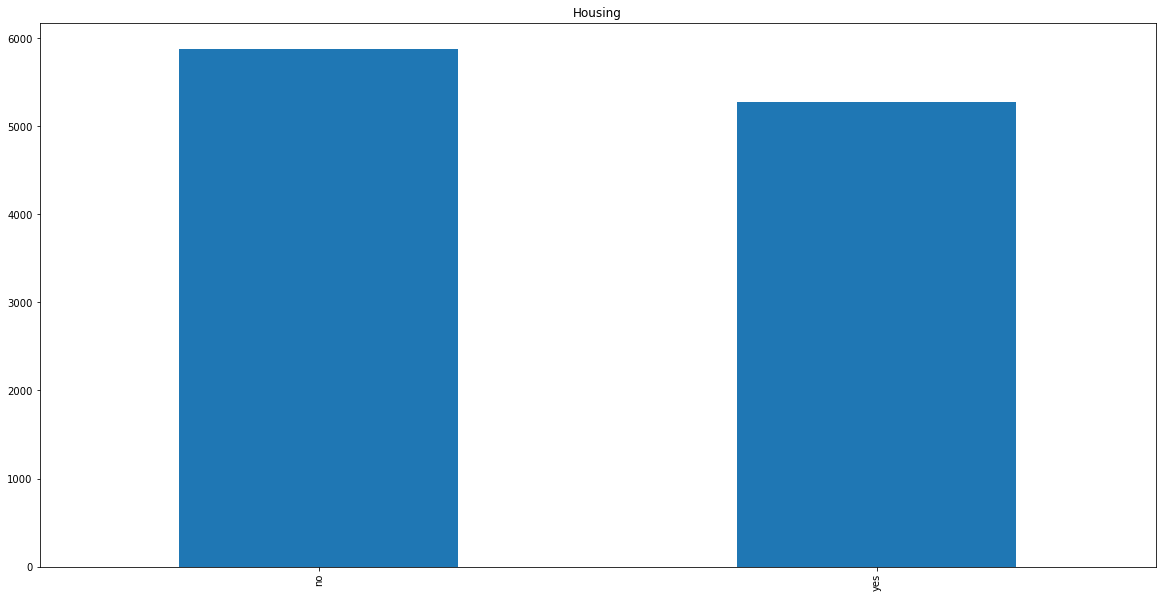

In [25]:
plt.subplot()
data['housing'].value_counts().plot(kind='bar',title='Housing',figsize=(20,10))

<AxesSubplot:title={'center':'Loan'}>

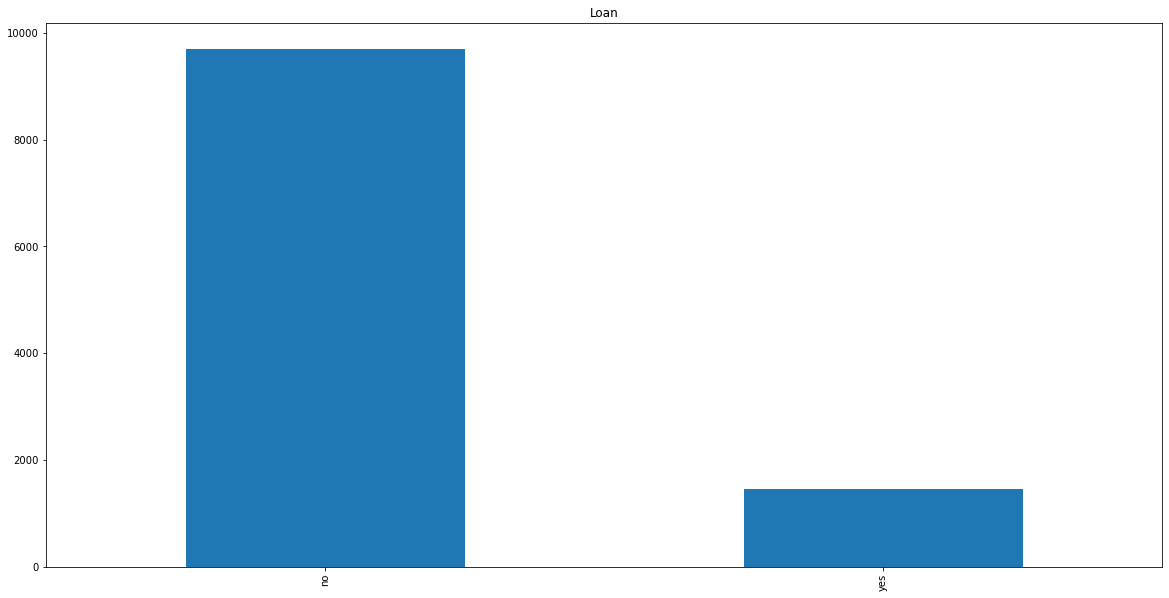

In [26]:
plt.subplot()
data['loan'].value_counts().plot(kind='bar',title='Loan',figsize=(20,10))

<AxesSubplot:title={'center':'Day'}>

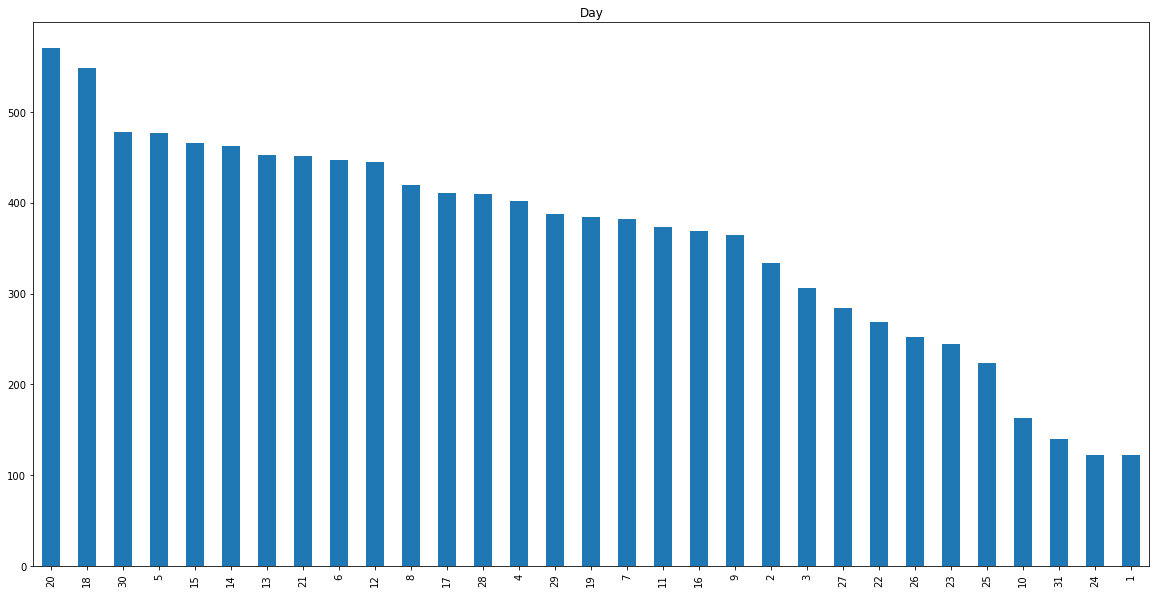

In [27]:
plt.subplot()
data['day'].value_counts().plot(kind='bar',title='Day',figsize=(20,10))

<AxesSubplot:title={'center':'Month'}>

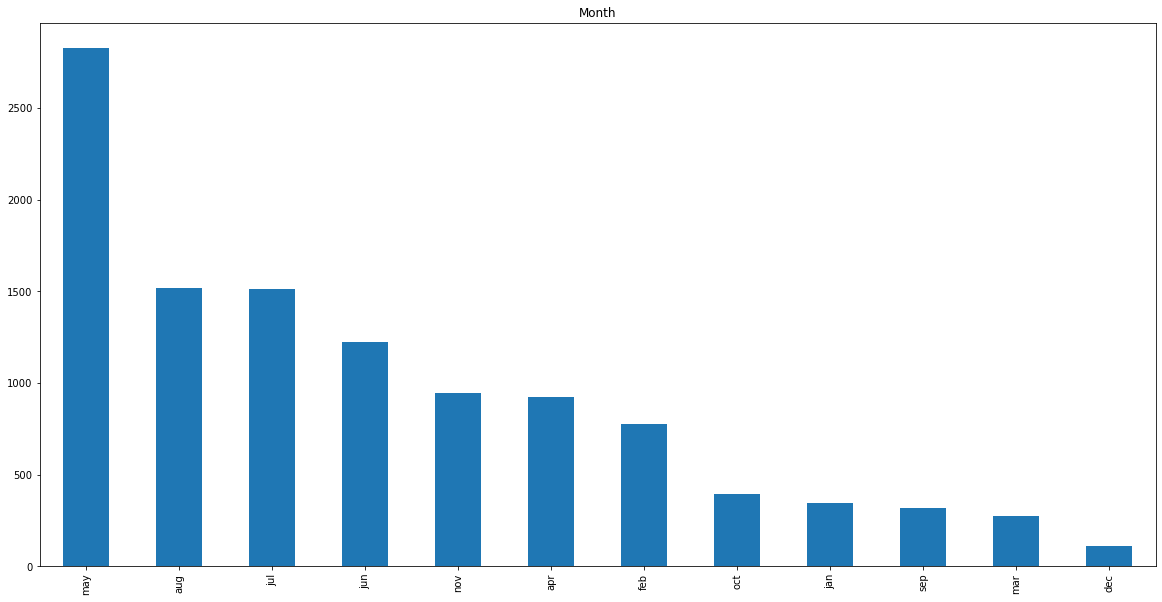

In [28]:
plt.subplot()
data['month'].value_counts().plot(kind='bar',title='Month',figsize=(20,10))

<AxesSubplot:title={'center':'Campaign'}>

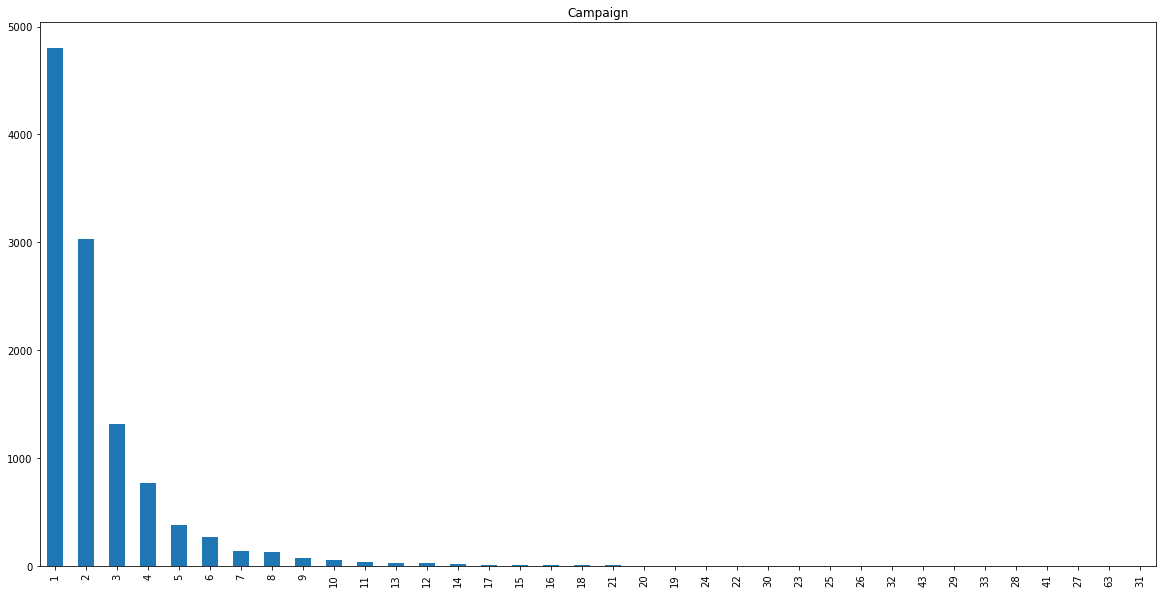

In [29]:
plt.subplot()
data['campaign'].value_counts().plot(kind='bar',title='Campaign',figsize=(20,10))

<AxesSubplot:title={'center':'Number of contacts performed before this campaign'}>

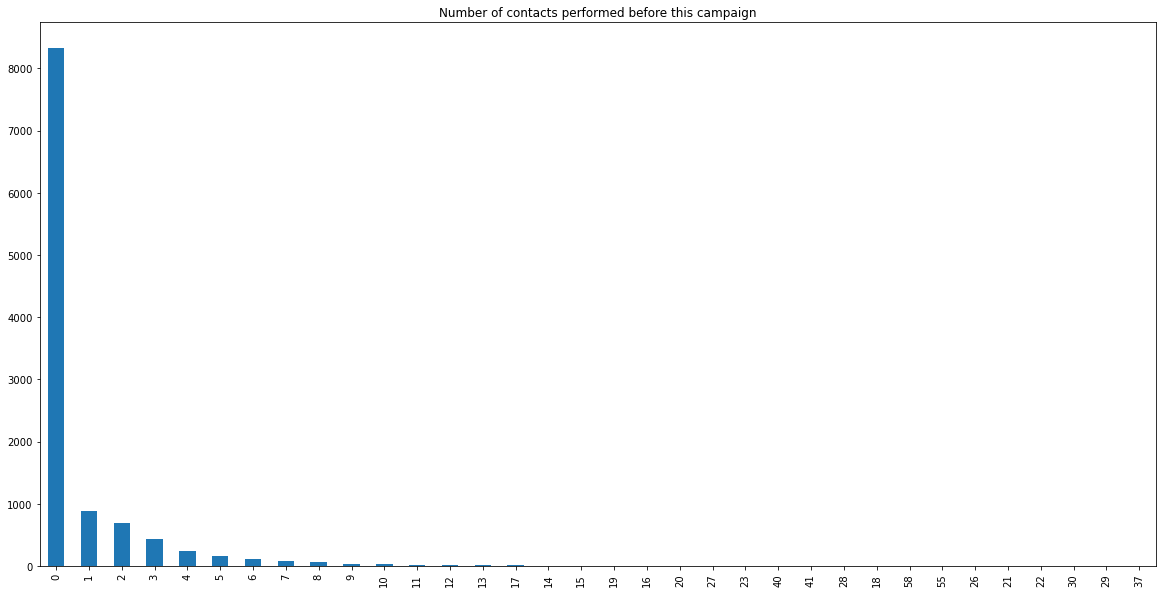

In [30]:
plt.subplot()
data['previous'].value_counts().plot(kind='bar',title='Number of contacts performed before this campaign',figsize=(20,10))

<AxesSubplot:title={'center':'Outcome of the previous Marketing campaign'}>

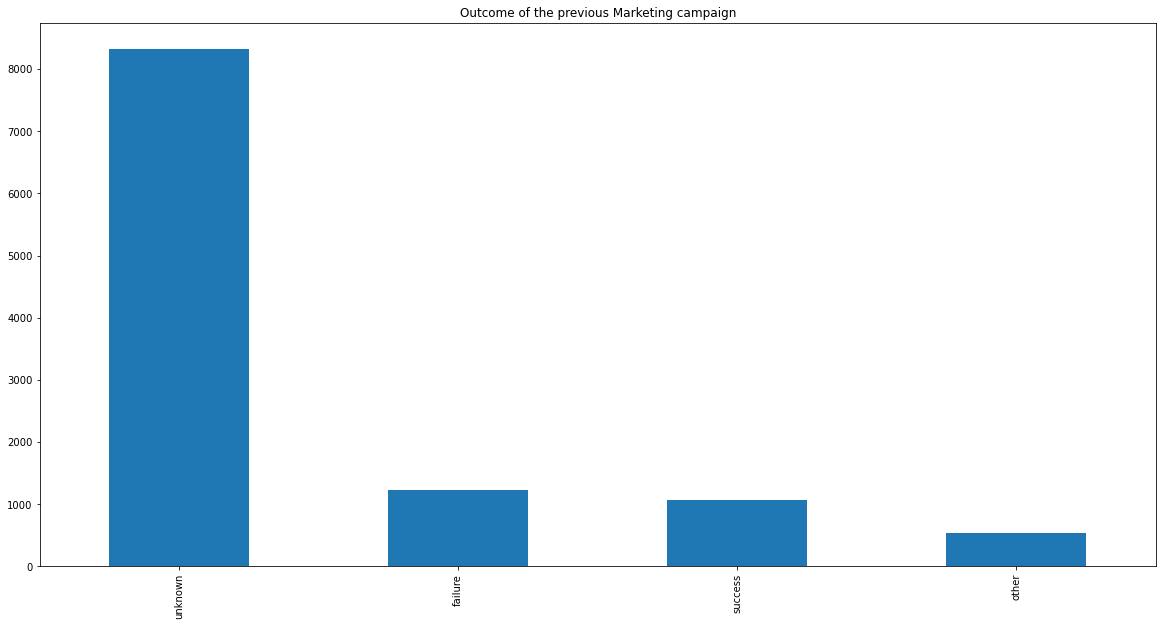

In [31]:
plt.subplot()
data['poutcome'].value_counts().plot(kind='bar',title='Outcome of the previous Marketing campaign',figsize=(20,10))

<AxesSubplot:title={'center':'the client subscribed a term deposit? (binary: yes/no)'}>

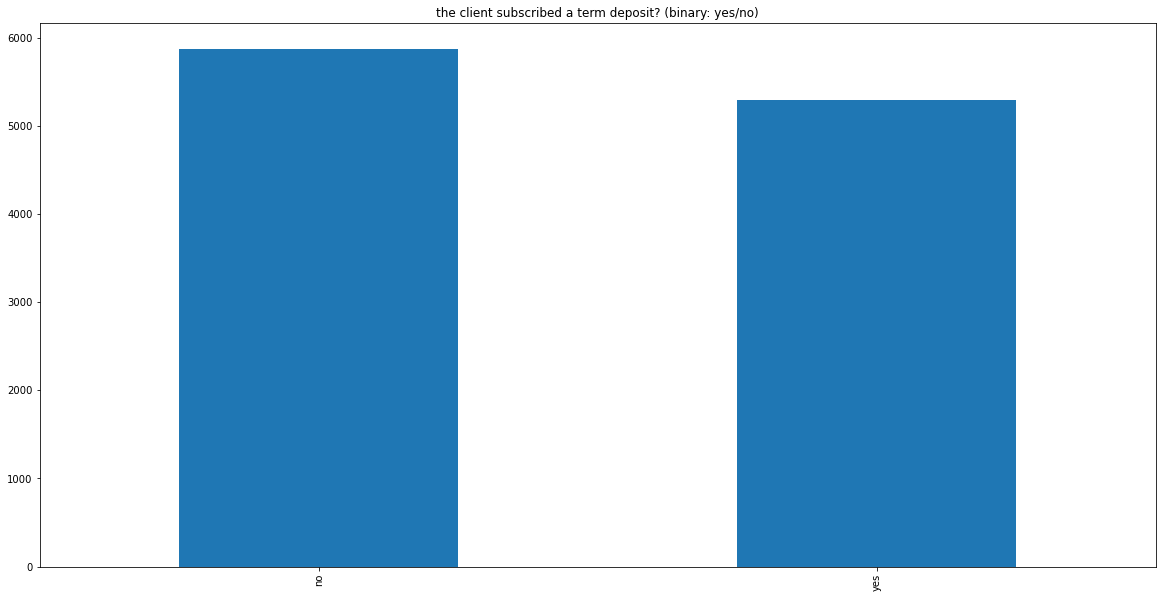

In [32]:
plt.subplot()
data['deposit'].value_counts().plot(kind='bar',title='the client subscribed a term deposit? (binary: yes/no)',figsize=(20,10))

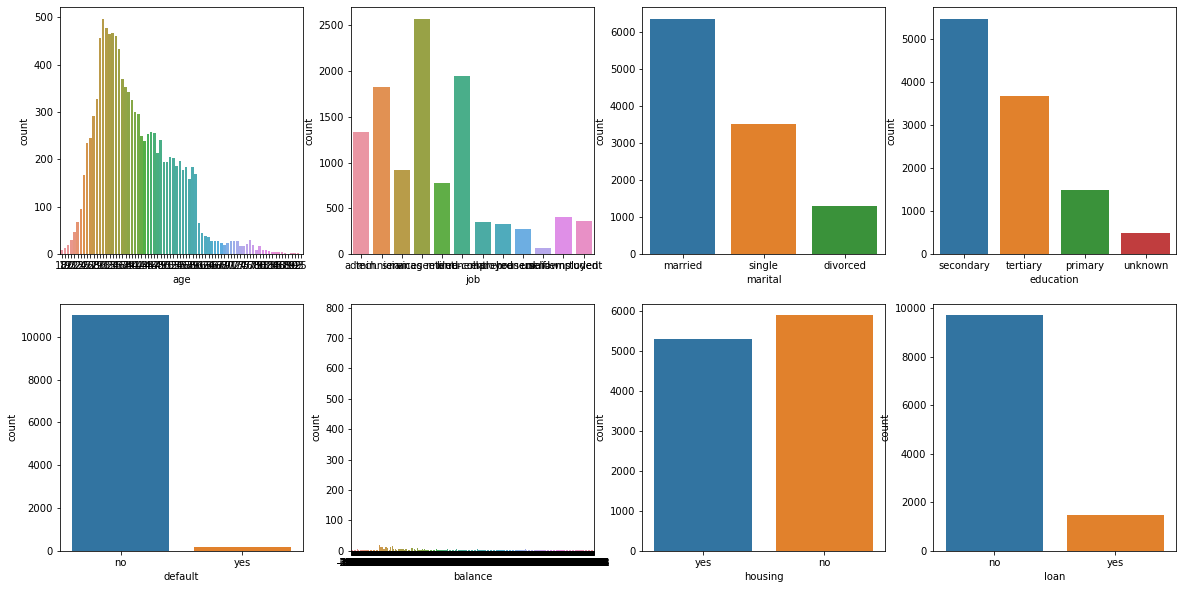

In [33]:
fig,ax=plt.subplots(2,4,figsize=(20,10))
sns.countplot('age',data=data,ax=ax[0][0])
sns.countplot('job',data=data,ax=ax[0][1])
sns.countplot('marital',data=data,ax=ax[0][2])
sns.countplot('education',data=data,ax=ax[0][3])
sns.countplot('default',data=data,ax=ax[1][0])
sns.countplot('balance',data=data,ax=ax[1][1])
sns.countplot('housing',data=data,ax=ax[1][2])
sns.countplot('loan',data=data,ax=ax[1][3])

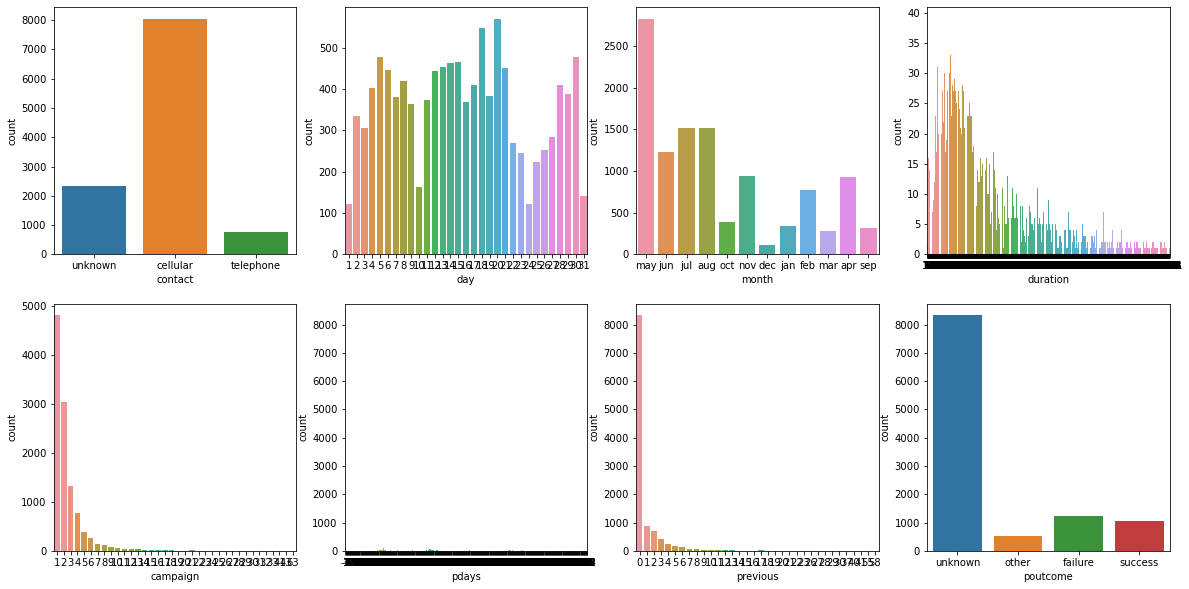

In [34]:
fig,ax=plt.subplots(2,4,figsize=(20,10))
sns.countplot('contact',data=data,ax=ax[0][0])
sns.countplot('day',data=data,ax=ax[0][1])
sns.countplot('month',data=data,ax=ax[0][2])
sns.countplot('duration',data=data,ax=ax[0][3])
sns.countplot('campaign',data=data,ax=ax[1][0])
sns.countplot('pdays',data=data,ax=ax[1][1])
sns.countplot('previous',data=data,ax=ax[1][2])
sns.countplot('poutcome',data=data,ax=ax[1][3])

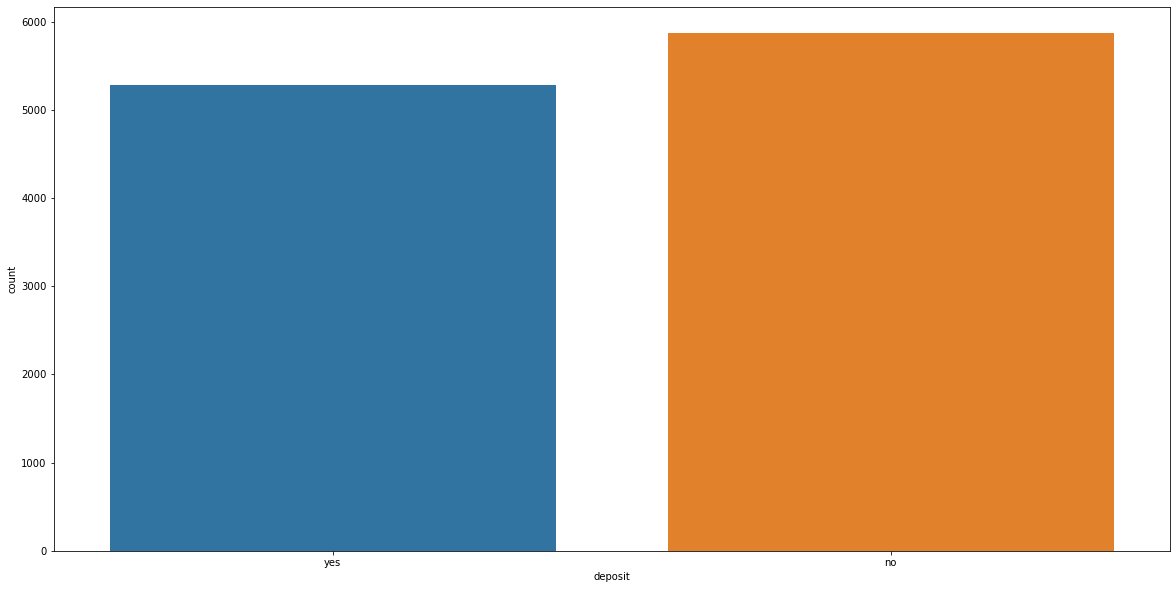

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(data['deposit'])
plt.show()

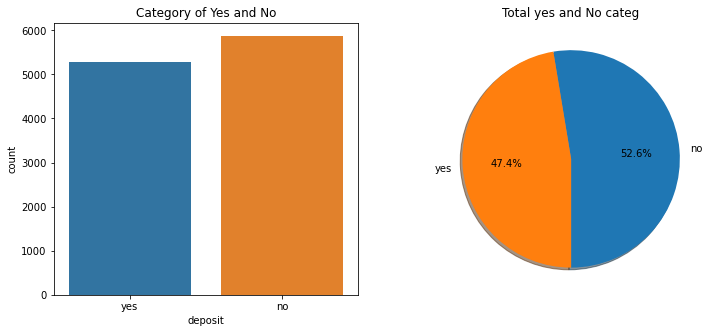

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=data)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =data['deposit'].value_counts(sort = True).index
sizes = data['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

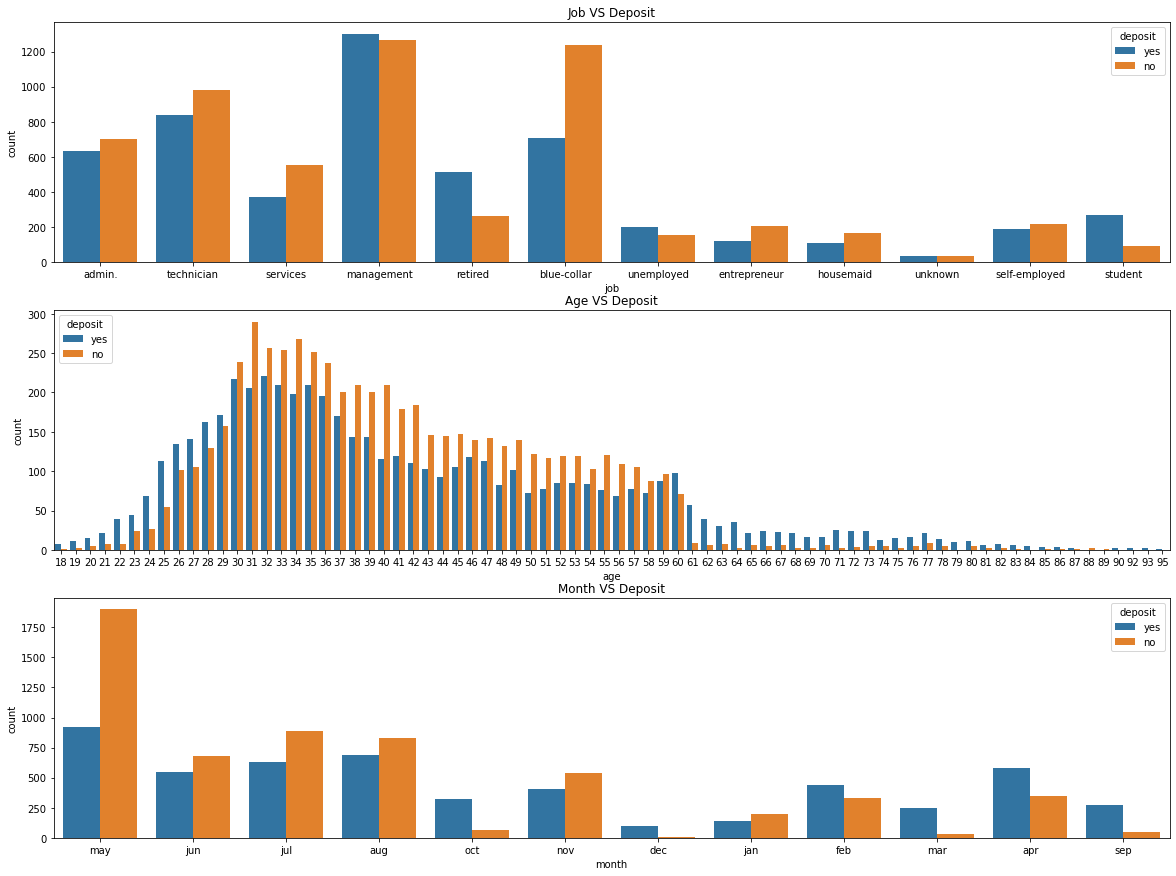

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(data['job'],hue=data['deposit'])
plt.title('Job VS Deposit')

plt.subplot(3,1,2)
sns.countplot(data['age'],hue=data['deposit'])
plt.title('Age VS Deposit')

plt.subplot(3,1,3)
sns.countplot(data['month'],hue=data['deposit'])
plt.title('Month VS Deposit')

plt.show()

In [38]:
data_cat=data.select_dtypes(include='object').columns.drop(["deposit","job"])
data_cat

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

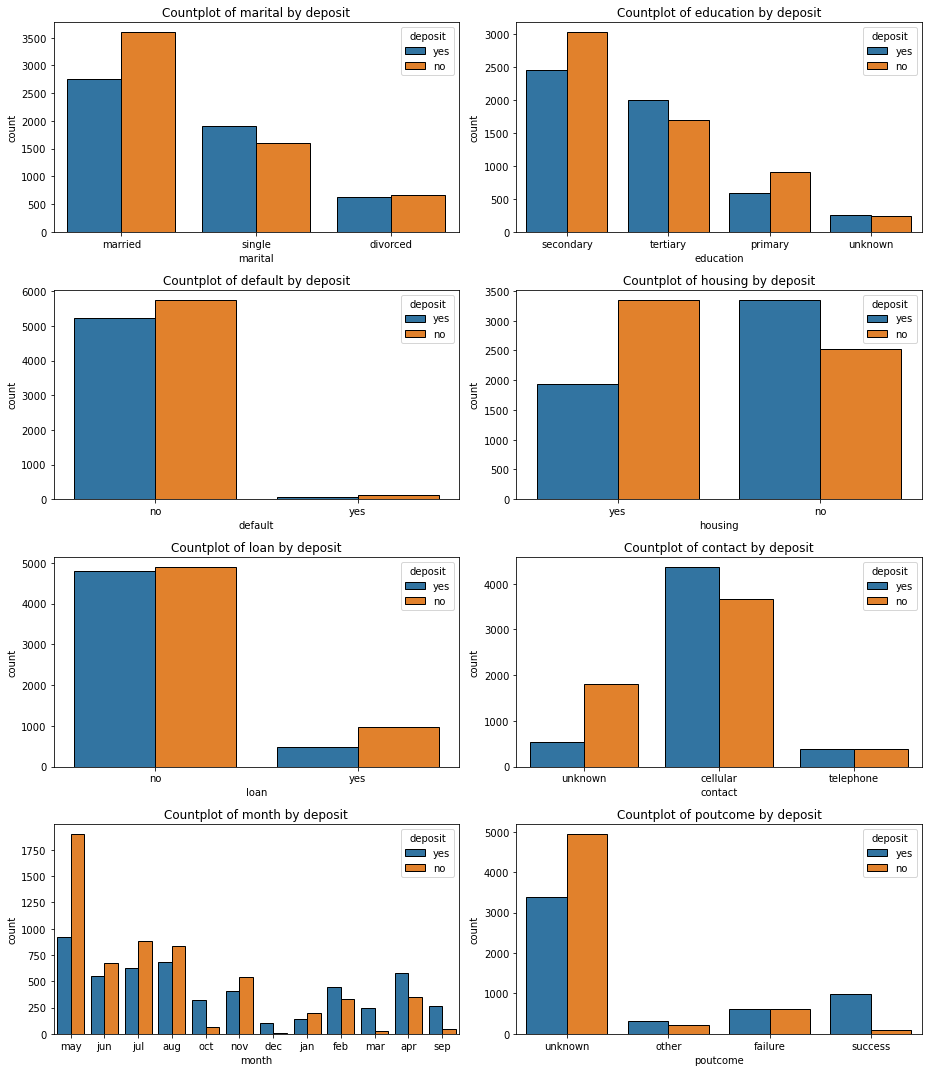

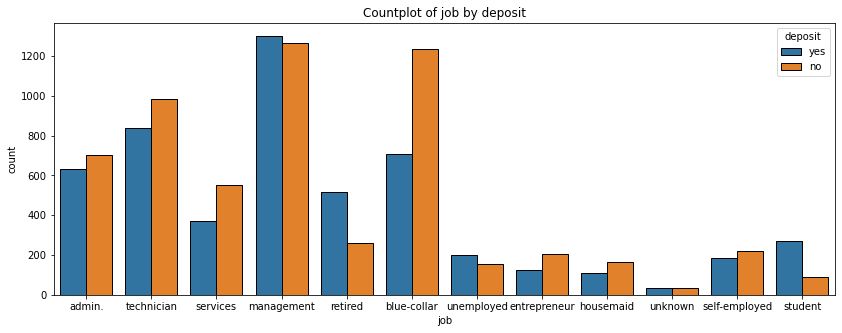

In [39]:
plt.figure(figsize=(13,15))
for i, cat_fea in enumerate(data_cat):
    plt.subplot(4,2, i+1)
    sns.countplot(x=cat_fea,hue='deposit',data=data,edgecolor="black")
    plt.title("Countplot of {} by deposit".format(cat_fea))
    
plt.tight_layout()
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job',hue='deposit',edgecolor="black",data=data)
plt.title("Countplot of job by deposit")
plt.show()

###### Descriptive Statistics

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous
7 deposit


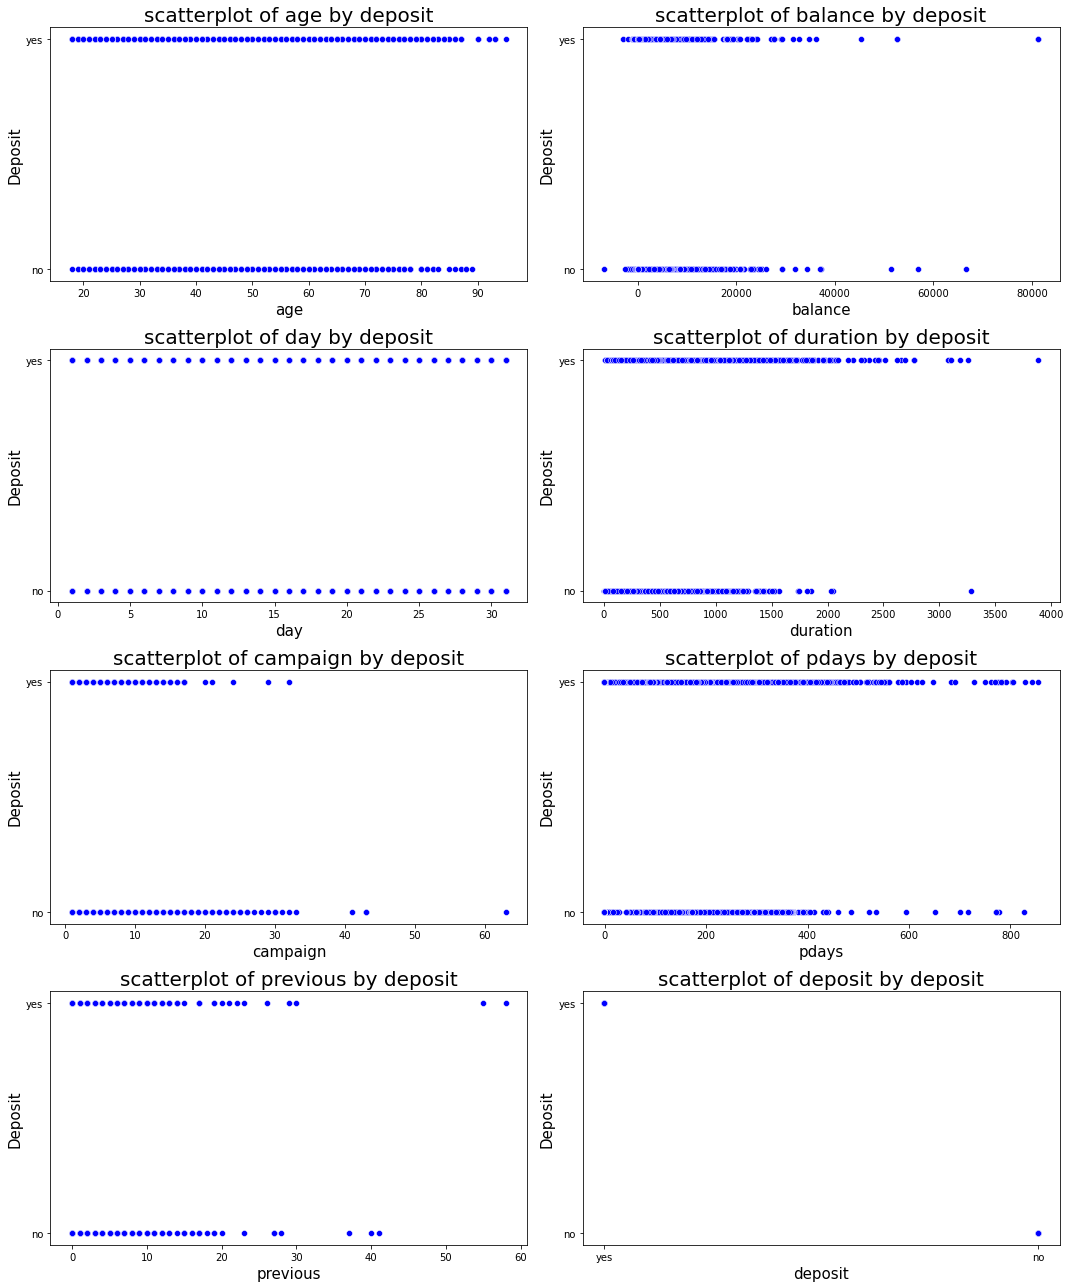

In [40]:
data_num=data[['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous' , 'deposit']]
col=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous' , 'deposit']
plt.figure(figsize=(15,18))
for i, v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='deposit',data=data_num,color='blue')
    plt.title("scatterplot of {} by deposit".format(v),size=20,color="black")
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


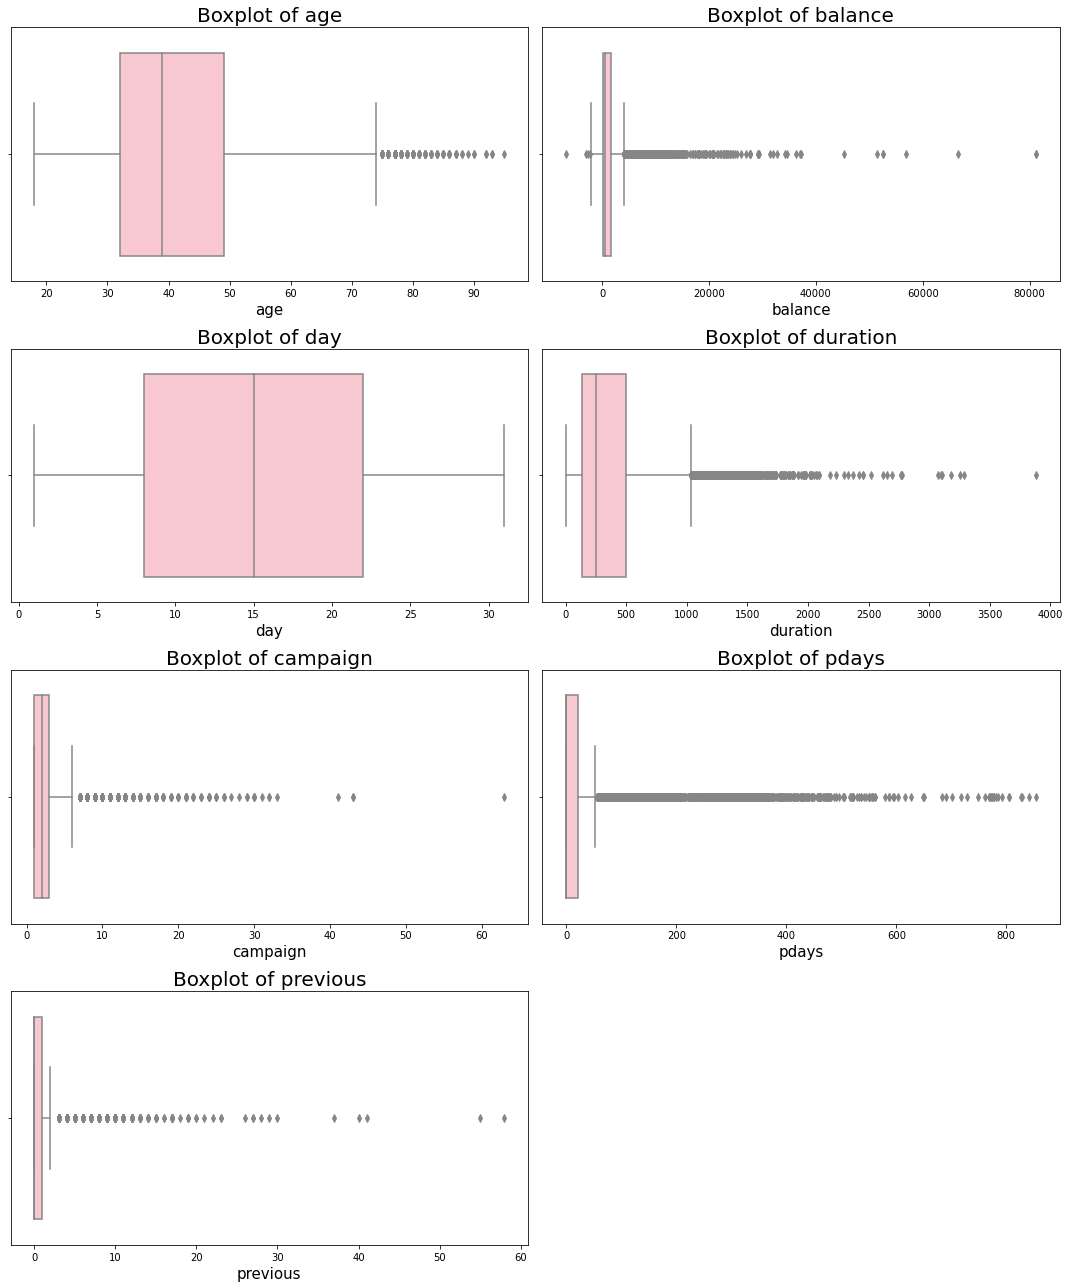

In [41]:
data_num = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=data_num,color='pink')
    plt.title("Boxplot of {}".format(v),size=20,color="black")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

<AxesSubplot:>

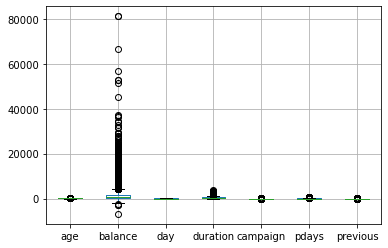

In [42]:
data.boxplot()

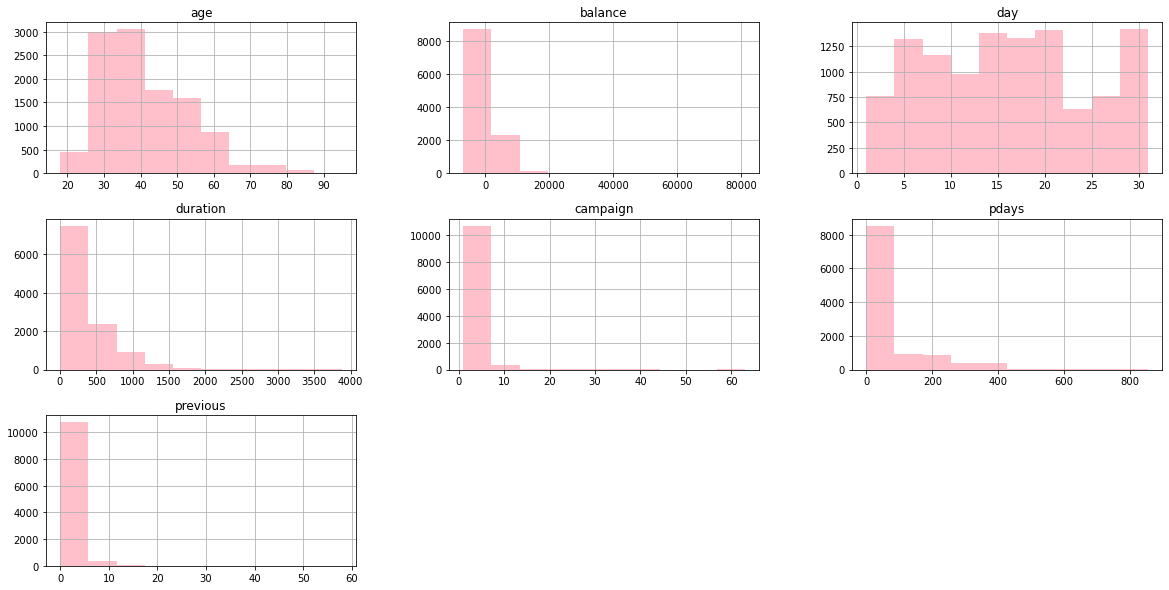

In [43]:
data.hist(color='pink',figsize=(20,10))
plt.show()

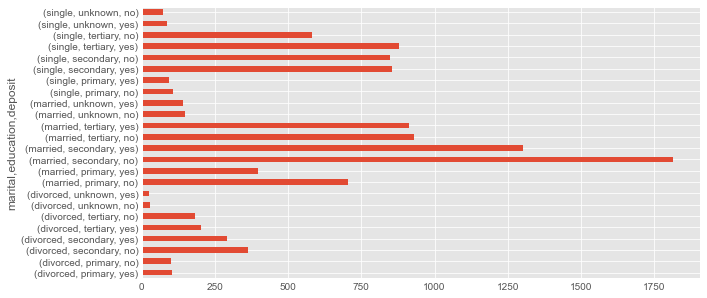

In [44]:
import matplotlib.style as style
style.use('seaborn-darkgrid')
style.use('ggplot')
data.groupby(['marital' , 'education'])['deposit'].value_counts().plot(kind='barh',figsize=(10,5))
plt.xticks()
plt.xlabel(None)
plt.show()

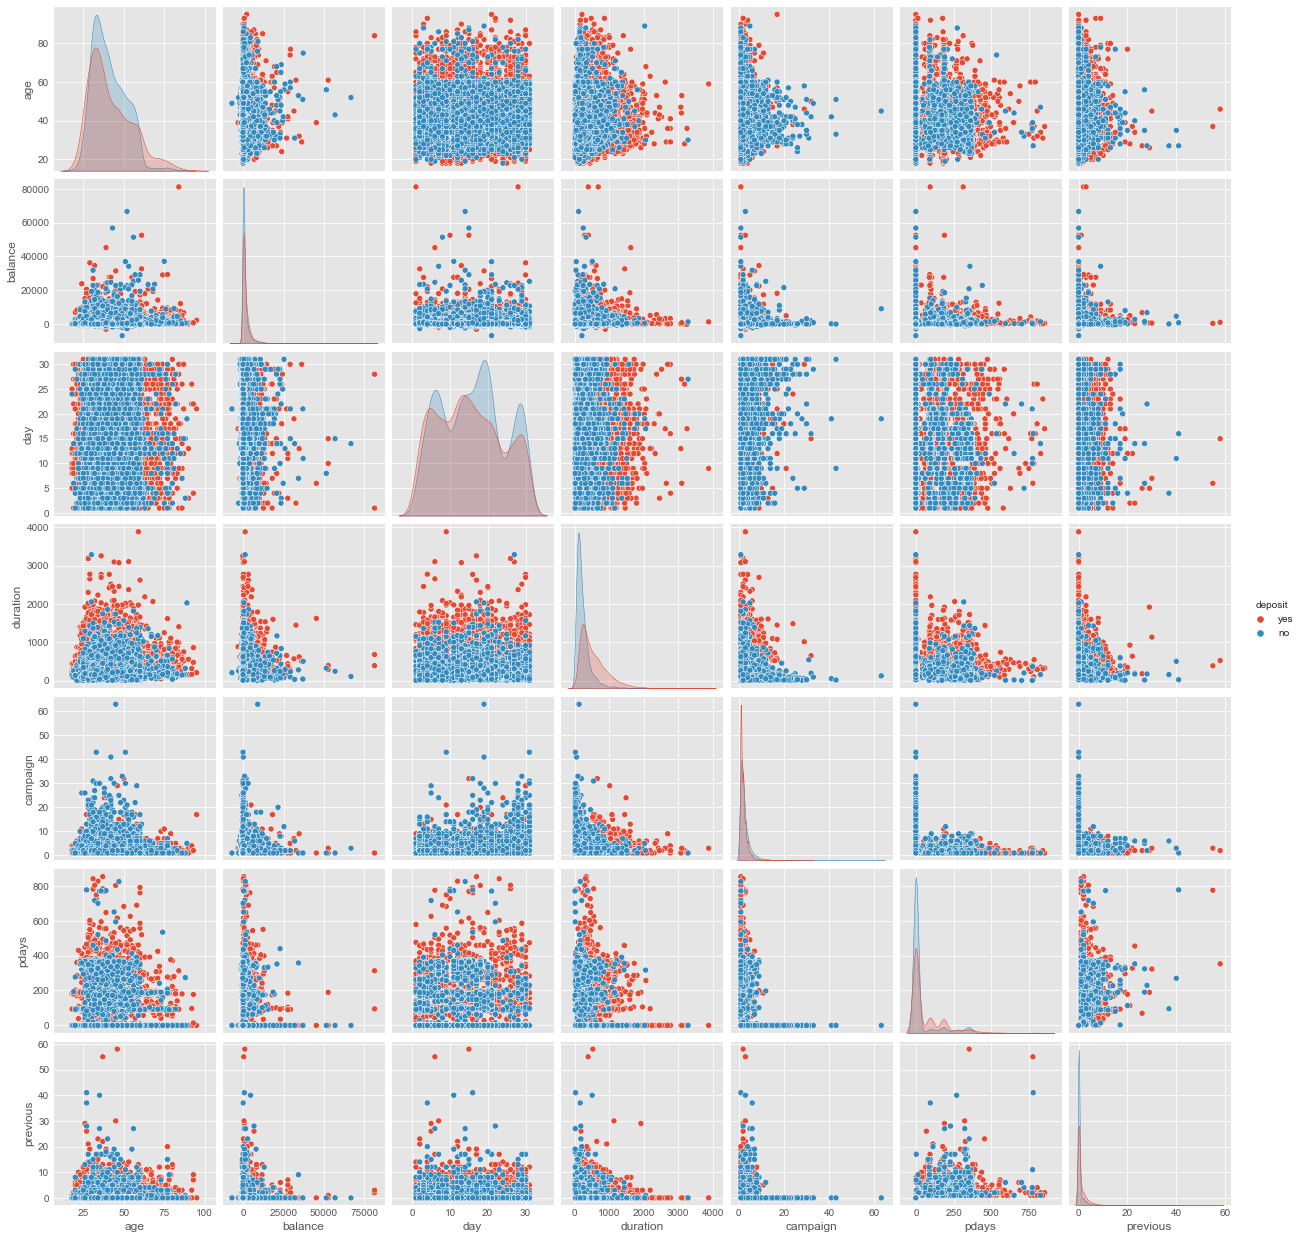

In [45]:
sns.pairplot(data=data,hue='deposit')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['education']=le.fit_transform(data['education'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['deposit']=le.fit_transform(data['deposit'])
data['default']=le.fit_transform(data['default'])

In [47]:
data.describe

<bound method NDFrame.describe of        age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0       

In [48]:
data.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   
5   42    4        2          2        0        0        1     1        2   
6   56    4        1          2        0      830        1     1        2   
7   60    5        0          1        0      545        1     0        2   
8   37    9        1          1        0        1        1     0        2   
9   28    7        2          1        0     5090        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  
5    5      8       562         2     -1         0         3        1  
6    6      8      1201         1     -1         0         3        1  
7    6      8      1030         1     -1         0         3        1  
8    6      8       608         1     -1         0         3        1  
9    6      8      1297         3     -1         0         3        1

###### Modelling

In [49]:
X=data.drop('deposit' , axis=1)
y=data['deposit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7813, 16)
(7813,)
(3349, 16)
(3349,)


In [50]:
data['job'].unique()

array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

###### Evaluation

In [51]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7961
- F1 score: 0.795923
- Precision: 0.796003
- Recall: 0.796109
----------------------------------
Model performance for Test set
- Accuracy: 0.7910
- Fl score: 0.7907
- Precision: 0.7912
- Recall: 0.7910


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7826
- Fl score: 0.7826
- Precision: 0.7826
- Recall: 0.7826


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.8408
- Fl score: 0.8409
- Precision: 0.8423
- Recall: 0.8408


Support Vector Machine
Model performance for Training set
- Accuracy: 0.7403
- F1 score: 0.736766
- Precision: 0.745746
- Recall: 0.740305
----------------------------------


#### THANK YOU